In [38]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
data = pd.read_csv('mnist_train.csv')

In [40]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [42]:
Y_train

array([5, 7, 0, ..., 7, 2, 2])

In [43]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [44]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [45]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[6 2 4 ... 7 4 5] [5 7 0 ... 7 2 2]
0.07886440677966101
Iteration:  10
[6 1 4 ... 7 4 0] [5 7 0 ... 7 2 2]
0.12540677966101696
Iteration:  20
[6 1 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.1923728813559322
Iteration:  30
[6 1 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.24979661016949153
Iteration:  40
[0 7 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.29022033898305083
Iteration:  50
[0 7 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.3314745762711864
Iteration:  60
[0 7 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.3843898305084746
Iteration:  70
[0 7 0 ... 7 2 0] [5 7 0 ... 7 2 2]
0.43996610169491523
Iteration:  80
[3 7 0 ... 7 2 2] [5 7 0 ... 7 2 2]
0.48738983050847456
Iteration:  90
[3 7 0 ... 9 2 2] [5 7 0 ... 7 2 2]
0.5261525423728813
Iteration:  100
[3 7 0 ... 9 2 2] [5 7 0 ... 7 2 2]
0.562864406779661
Iteration:  110
[3 7 0 ... 1 2 2] [5 7 0 ... 7 2 2]
0.5949661016949153
Iteration:  120
[3 7 0 ... 1 2 2] [5 7 0 ... 7 2 2]
0.6231694915254238
Iteration:  130
[3 7 0 ... 1 2 2] [5 7 0 ... 7 2 2]
0.6461186440677966
Iteration:  

In [46]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


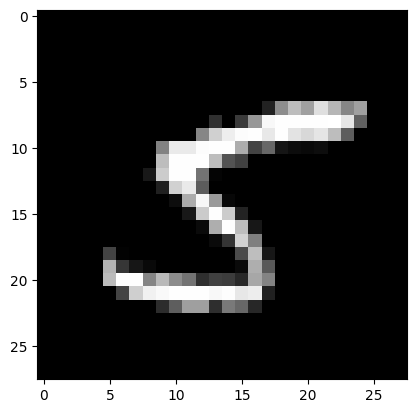

Prediction:  [7]
Label:  7


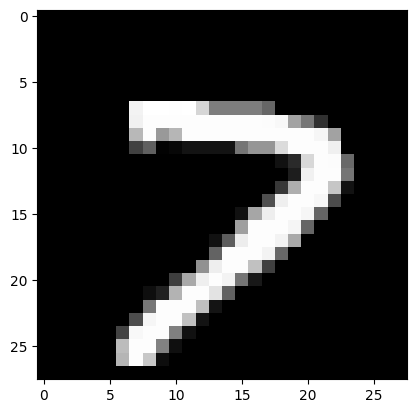

Prediction:  [0]
Label:  0


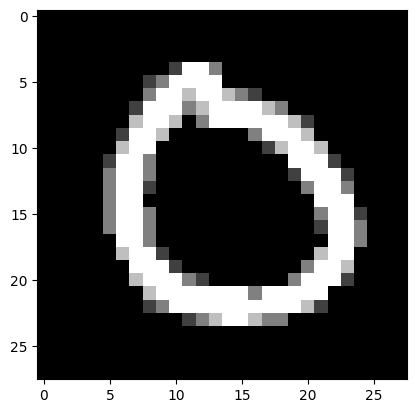

Prediction:  [1]
Label:  1


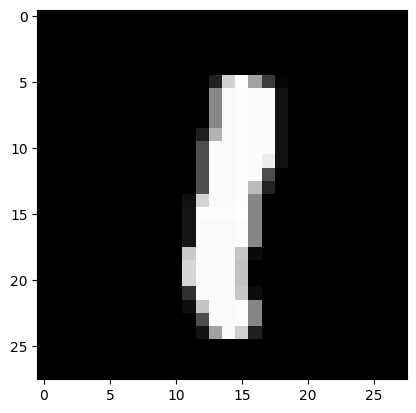

In [47]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [48]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 7 2 8 8 0 5 4 6 3 3 6 4 5 1 6 1 3 1 1 2 9 2 9 2 7 4 2 8 9 4 3 8 2 3 4 2
 7 7 0 8 0 3 1 8 3 0 0 7 0 3 1 3 7 1 6 7 2 1 1 0 1 2 8 3 0 8 5 6 0 5 4 9 7
 5 9 7 5 6 7 8 3 3 7 2 8 6 8 2 6 9 8 4 7 1 7 5 1 4 7 7 5 9 2 0 8 4 1 8 3 5
 4 8 9 8 1 1 2 7 9 0 7 1 3 9 8 9 4 5 7 7 3 8 8 9 5 1 4 2 9 8 1 1 7 3 9 8 4
 2 4 1 7 1 8 5 1 0 4 8 1 6 9 6 4 5 2 0 8 6 5 2 6 7 5 7 2 6 7 6 4 2 7 6 9 1
 9 4 2 3 1 4 9 2 6 0 0 4 4 4 8 0 0 5 5 2 6 0 2 6 4 2 6 6 4 3 6 3 4 7 1 0 9
 5 5 3 8 7 8 5 8 7 0 5 8 1 3 2 9 8 0 1 2 5 2 3 2 1 5 3 7 4 3 1 5 8 1 5 2 4
 9 0 7 4 3 0 0 6 7 6 8 8 9 0 5 3 4 4 9 5 6 1 4 9 8 8 2 1 2 0 0 3 3 3 4 0 6
 2 9 0 6 2 0 1 8 6 8 0 8 4 6 8 6 9 9 5 5 3 5 0 9 1 8 0 3 4 6 9 2 7 5 7 1 5
 5 1 0 0 3 1 7 3 4 7 8 4 0 1 4 2 2 4 4 9 1 3 3 4 2 0 6 5 9 6 9 0 4 0 5 1 5
 5 4 2 7 1 1 7 0 2 8 4 6 5 0 3 8 2 6 7 7 7 9 0 1 1 5 7 3 6 0 2 7 4 3 4 6 7
 6 6 1 6 6 5 7 1 6 0 8 9 3 7 9 8 0 4 9 5 1 7 6 4 1 1 9 5 9 2 1 3 7 2 7 4 4
 5 7 7 6 2 0 2 5 5 9 3 9 1 3 1 2 1 3 2 1 9 8 8 9 0 2 4 1 1 3 4 8 1 2 3 6 3
 0 9 3 3 4 9 0 8 0 4 3 3 

0.862